### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('datasets/train.csv')
df = df.rename(str.lower, axis=1)
df.columns = [name.replace(' ', '_') if ' ' in name else name for name in df.columns]
df = df[df['bedroom_abvgr'] != 0]

### Polyfeatures Models

##### Feature Engineering

In [3]:
df['age'] = [df['year_built'].max()-year for year in df['year_built']]
df['age*overall_qual'] = df['age']*df['overall_qual']
df['gr_liv_area/bedroom_abvgr'] = df['gr_liv_area']/df['bedroom_abvgr']

In [4]:
features_1= df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual', 'age*overall_qual', 'gr_liv_area/bedroom_abvgr']]

In [5]:
pd.get_dummies(df, columns=['kitchen_qual'])
kitchen_qual = pd.get_dummies(df['kitchen_qual'], drop_first=True)
features_1 = pd.concat([features_1, kitchen_qual], axis=1)

In [6]:
X = features_1
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)
pd.DataFrame(X_test_pf, columns=pf.get_feature_names(X.columns))

,gr_liv_area,bedroom_abvgr,age,overall_qual,age*overall_qual,gr_liv_area/bedroom_abvgr,Fa,Gd,TA,gr_liv_area^2,...,gr_liv_area/bedroom_abvgr^2,gr_liv_area/bedroom_abvgr Fa,gr_liv_area/bedroom_abvgr Gd,gr_liv_area/bedroom_abvgr TA,Fa^2,Fa Gd,Fa TA,Gd^2,Gd TA,TA^2
0,841.0,2.0,60.0,4.0,240.0,420.500000,0.0,0.0,1.0,707281.0,...,176820.250000,0.0,0.000000,420.500000,0.0,0.0,0.0,0.0,0.0,1.0
1,1630.0,3.0,6.0,7.0,42.0,543.333333,0.0,1.0,0.0,2656900.0,...,295211.111111,0.0,543.333333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
2,1246.0,3.0,46.0,6.0,276.0,415.333333,0.0,0.0,1.0,1552516.0,...,172501.777778,0.0,0.000000,415.333333,0.0,0.0,0.0,0.0,0.0,1.0
3,1680.0,3.0,17.0,6.0,102.0,560.000000,0.0,1.0,0.0,2822400.0,...,313600.000000,0.0,560.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
4,2448.0,4.0,16.0,8.0,128.0,612.000000,0.0,1.0,0.0,5992704.0,...,374544.000000,0.0,612.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1072.0,2.0,5.0,6.0,30.0,536.000000,0.0,1.0,0.0,1149184.0,...,287296.000000,0.0,536.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
508,1224.0,3.0,62.0,6.0,372.0,408.000000,0.0,0.0,1.0,1498176.0,...,166464.000000,0.0,0.000000,408.000000,0.0,0.0,0.0,0.0,0.0,1.0
509,672.0,2.0,85.0,4.0,340.0,336.000000,0.0,0.0,1.0,451584.0,...,112896.000000,0.0,0.000000,336.000000,0.0,0.0,0.0,0.0,0.0,1.0
510,1495.0,3.0,4.0,6.0,24.0,498.333333,0.0,1.0,0.0,2235025.0,...,248336.111111,0.0,498.333333,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
ss = StandardScaler()                  
ss.fit(X_train_pf)
Z_train = ss.transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [8]:
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train), lr.score(Z_test, y_test)

(0.8570533583065845, 0.8374662553855754)

In [9]:
l_alphas = np.linspace(0.000001, .3, 300)
lcv = LassoCV()
lcv.fit(Z_train, y_train)
lcv.score(Z_train, y_train), lcv.score(Z_test, y_test);

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999116861.276123, tolerance: 780163996.1424893
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2021316769.9822998, tolerance: 780163996.1424893
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2432504591.3026123, tolerance: 780163996.1424893
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

In [10]:
lcv.alpha_

1129.5111722806357

In [11]:
lcv.score

<bound method RegressorMixin.score of LassoCV()>

In [12]:
y_preds = lcv.predict(Z_test)
resids = y_test-y_preds                     
resids.mean() 

945.7633742440494

### First Polynomial Metrics

In [13]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(lcv, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 22965.080395168556
RMSE = 32988.744829916635
CVS = 0.6594519180162346


In [14]:
df['age'] = [df['year_built'].max()-year for year in df['year_built']]
df['age*overall_qual'] = df['age']*df['overall_qual']
df['gr_liv_area/bedroom_abvgr'] = df['gr_liv_area']/df['bedroom_abvgr']
df['since_remod/add'] = [2010-year for year in df['year_remod/add']]
df.drop(index=1712, inplace=True)
df.drop(index=1327, inplace=True)
df['gr_liv_area/totrms_abvgrd'] = df['gr_liv_area']/df['totrms_abvgrd']
df['gr_liv_area/bedroom_abvgr']
k_q_order = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['kitchen_qual_order'] = [k_q_order[n] for n in df['kitchen_qual']]

In [15]:
tuning = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf']]

In [16]:
# pd.get_dummies(df, columns=['kitchen_qual'])
# kitchen_qual = pd.get_dummies(df['kitchen_qual'], drop_first=True)
# features_1 = pd.concat([features_1, kitchen_qual], axis=1)

In [17]:
X = tuning
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)
pd.DataFrame(X_test_pf, columns=pf.get_feature_names(X.columns))

,gr_liv_area,bedroom_abvgr,age,overall_qual,gr_liv_area/totrms_abvgrd,since_remod/add,1st_flr_sf,garage_area,kitchen_qual_order,garage_cars,...,garage_area^2,garage_area kitchen_qual_order,garage_area garage_cars,garage_area total_bsmt_sf,kitchen_qual_order^2,kitchen_qual_order garage_cars,kitchen_qual_order total_bsmt_sf,garage_cars^2,garage_cars total_bsmt_sf,total_bsmt_sf^2
0,841.0,2.0,60.0,4.0,210.250000,60.0,841.0,294.0,2.0,1.0,...,86436.0,588.0,294.0,211974.0,4.0,2.0,1442.0,1.0,721.0,519841.0
1,1630.0,3.0,6.0,7.0,232.857143,5.0,868.0,436.0,3.0,2.0,...,190096.0,1308.0,872.0,378448.0,9.0,6.0,2604.0,4.0,1736.0,753424.0
2,1246.0,3.0,46.0,6.0,207.666667,46.0,1246.0,441.0,2.0,2.0,...,194481.0,882.0,882.0,549486.0,4.0,4.0,2492.0,4.0,2492.0,1552516.0
3,1680.0,3.0,17.0,6.0,240.000000,16.0,886.0,474.0,3.0,2.0,...,224676.0,1422.0,948.0,419964.0,9.0,6.0,2658.0,4.0,1772.0,784996.0
4,2448.0,4.0,16.0,8.0,306.000000,5.0,1686.0,711.0,3.0,3.0,...,505521.0,2133.0,2133.0,1158219.0,9.0,9.0,4887.0,9.0,4887.0,2653641.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1488.0,3.0,46.0,6.0,212.571429,46.0,1488.0,430.0,2.0,2.0,...,184900.0,860.0,860.0,433440.0,4.0,4.0,2016.0,4.0,2016.0,1016064.0
507,1072.0,2.0,5.0,6.0,214.400000,5.0,1072.0,525.0,3.0,2.0,...,275625.0,1575.0,1050.0,287175.0,9.0,6.0,1641.0,4.0,1094.0,299209.0
508,1224.0,3.0,62.0,6.0,244.800000,6.0,816.0,280.0,2.0,1.0,...,78400.0,560.0,280.0,228480.0,4.0,2.0,1632.0,1.0,816.0,665856.0
509,672.0,2.0,85.0,4.0,168.000000,60.0,672.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,864.0,0.0,0.0,186624.0


In [18]:
ss = StandardScaler()                  
ss.fit(X_train_pf)
Z_train = ss.transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [19]:
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train), lr.score(Z_test, y_test)

(0.8972895222801519, 0.8906525970100949)

In [20]:
X = tuning
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)
pd.DataFrame(X_test_pf, columns=pf.get_feature_names(X.columns))

,gr_liv_area,bedroom_abvgr,age,overall_qual,gr_liv_area/totrms_abvgrd,since_remod/add,1st_flr_sf,garage_area,kitchen_qual_order,garage_cars,...,garage_area^2,garage_area kitchen_qual_order,garage_area garage_cars,garage_area total_bsmt_sf,kitchen_qual_order^2,kitchen_qual_order garage_cars,kitchen_qual_order total_bsmt_sf,garage_cars^2,garage_cars total_bsmt_sf,total_bsmt_sf^2
0,841.0,2.0,60.0,4.0,210.250000,60.0,841.0,294.0,2.0,1.0,...,86436.0,588.0,294.0,211974.0,4.0,2.0,1442.0,1.0,721.0,519841.0
1,1630.0,3.0,6.0,7.0,232.857143,5.0,868.0,436.0,3.0,2.0,...,190096.0,1308.0,872.0,378448.0,9.0,6.0,2604.0,4.0,1736.0,753424.0
2,1246.0,3.0,46.0,6.0,207.666667,46.0,1246.0,441.0,2.0,2.0,...,194481.0,882.0,882.0,549486.0,4.0,4.0,2492.0,4.0,2492.0,1552516.0
3,1680.0,3.0,17.0,6.0,240.000000,16.0,886.0,474.0,3.0,2.0,...,224676.0,1422.0,948.0,419964.0,9.0,6.0,2658.0,4.0,1772.0,784996.0
4,2448.0,4.0,16.0,8.0,306.000000,5.0,1686.0,711.0,3.0,3.0,...,505521.0,2133.0,2133.0,1158219.0,9.0,9.0,4887.0,9.0,4887.0,2653641.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1488.0,3.0,46.0,6.0,212.571429,46.0,1488.0,430.0,2.0,2.0,...,184900.0,860.0,860.0,433440.0,4.0,4.0,2016.0,4.0,2016.0,1016064.0
507,1072.0,2.0,5.0,6.0,214.400000,5.0,1072.0,525.0,3.0,2.0,...,275625.0,1575.0,1050.0,287175.0,9.0,6.0,1641.0,4.0,1094.0,299209.0
508,1224.0,3.0,62.0,6.0,244.800000,6.0,816.0,280.0,2.0,1.0,...,78400.0,560.0,280.0,228480.0,4.0,2.0,1632.0,1.0,816.0,665856.0
509,672.0,2.0,85.0,4.0,168.000000,60.0,672.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,864.0,0.0,0.0,186624.0


In [21]:
ss = StandardScaler()                  
ss.fit(X_train_pf)
Z_train = ss.transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [22]:
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train), lr.score(Z_test, y_test)

(0.8972895222801519, 0.8906525970100949)

In [23]:
l_alphas = np.linspace(0.000001, .3, 300)
lcv = LassoCV()
lcv.fit(Z_train, y_train)
lcv.score(Z_train, y_train), lcv.score(Z_test, y_test)

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111026179.9621582, tolerance: 765580492.3744174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794352895.3261719, tolerance: 765580492.3744174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917188855.4278564, tolerance: 765580492.3744174
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

(0.8912144243999623, 0.8920241486148004)

In [24]:
lcv.alpha_

69.55585725614894

In [25]:
lcv.score

<bound method RegressorMixin.score of LassoCV()>

In [26]:
y_preds = lcv.predict(Z_test)
resids = y_test-y_preds                     
resids.mean()

-129.12136221157374

In [27]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(lcv, X_train, y_train, cv=5)
print(f'CVS = {cvs}')

MAE = 18468.25946140892
RMSE = 26540.355580231953
CVS = [0.76522728 0.64272481 0.76567162 0.74047962 0.5922523 ]


In [28]:
df['resids'] = resids

In [29]:
df.drop(columns=['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual',
           'age*overall_qual', 'gr_liv_area/totrms_abvgrd', 'since_remod/add',
           '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf']).corr()['resids'].sort_values(ascending=False)

resids                       1.000000
saleprice                    0.295396
bsmtfin_sf_1                 0.291538
bsmt_full_bath               0.218751
lot_area                     0.195167
overall_cond                 0.176622
lot_frontage                 0.153868
fireplaces                   0.151501
screen_porch                 0.144582
mas_vnr_area                 0.086192
wood_deck_sf                 0.072533
bsmt_half_bath               0.068036
year_built                   0.056236
gr_liv_area/bedroom_abvgr    0.056102
year_remod/add               0.037129
id                           0.032604
bsmtfin_sf_2                 0.029833
misc_val                     0.028219
garage_yr_blt                0.012445
enclosed_porch               0.000524
3ssn_porch                  -0.010084
half_bath                   -0.018378
pid                         -0.020660
open_porch_sf               -0.022733
mo_sold                     -0.023388
low_qual_fin_sf             -0.027562
yr_sold     

In [30]:
df = pd.read_csv('datasets/train.csv')
df = df.rename(str.lower, axis=1)
df.columns = [name.replace(' ', '_') if ' ' in name else name for name in df.columns]

# Model 2
df['age'] = [df['year_built'].max()-year for year in df['year_built']]
df['age*overall_qual'] = df['age']*df['overall_qual']

# Model 3
kitchen_qual_order = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['kitchen_qual_order'] = [kitchen_qual_order[n] for n in df['kitchen_qual']]

# Model 4
df['gr_liv_area/totrms_abvgrd'] = df['gr_liv_area']/df['totrms_abvgrd']
df['since_remod/add'] = [2010-year for year in df['year_remod/add']]

# Model 5
df.drop(index=1712, inplace=True)
df.drop(index=1327, inplace=True)

# Model 6
df['before_1940'] = [1 if year < 1940 else 0 for year in df['year_built']]
df['over_10'] = [1 if age > 10 else 0 for age in df['age']]

# Model 7
df['before_1940'] = [1 if year < 1940 else 0 for year in df['year_built']]
df['over_10'] = [1 if age > 10 else 0 for age in df['age']]

In [31]:
features_7 = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'neighborhood']]

features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [32]:
X = features_7
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)
pd.DataFrame(X_test_pf, columns=pf.get_feature_names(X.columns));

In [33]:
ss = StandardScaler()                  
ss.fit(X_train_pf)
Z_train = ss.transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [34]:
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train), lr.score(Z_test, y_test)

(0.9552268304141633, -4.6198145768435135e+20)

In [35]:
l_alphas = np.linspace(0.000001, .3, 300)
lcv = LassoCV()
lcv.fit(Z_train, y_train)
lcv.score(Z_train, y_train), lcv.score(Z_test, y_test)

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850591348.1010742, tolerance: 770758974.6212007
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970887978.5209961, tolerance: 770758974.6212007
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1160289049.2369385, tolerance: 770758974.6212007
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

(0.9369562532113769, 0.9189566187239347)

In [36]:
lcv.alpha_

106.51037666887729

In [37]:
lcv.score

<bound method RegressorMixin.score of LassoCV()>

In [38]:
y_preds = lcv.predict(Z_test)
resids = y_test-y_preds                     
resids.mean()

-690.0551619891331

In [39]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(lcv, X_train, y_train, cv=5)
print(f'CVS = {cvs}')

MAE = 16020.614922399329
RMSE = 22703.169003555427
CVS = [0.79777466 0.77696863 0.7583535  0.7042485  0.47639302]


In [40]:
y_preds.shape

(513,)

In [41]:
df['saleprice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: saleprice, Length: 2049, dtype: int64

In [42]:
features_7 = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1',]]

# features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [43]:
X = features_7
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)
pd.DataFrame(X_test_pf, columns=pf.get_feature_names(X.columns));

In [44]:
ss = StandardScaler()                  
ss.fit(X_train_pf)
Z_train = ss.transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [45]:
l_alphas = np.linspace(0.000001, .3, 300)
lcv = LassoCV()
lcv.fit(Z_train, y_train)
lcv.score(Z_train, y_train), lcv.score(Z_test, y_test)

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1704398179.53833, tolerance: 770758974.6212007
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2079045645.6230469, tolerance: 770758974.6212007
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2146097205.5593262, tolerance: 770758974.6212007
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: C

(0.9089892324705593, 0.9057613128129278)

In [46]:
y_preds = lcv.predict(Z_test)
resids = y_test-y_preds                     
resids.mean()

-1030.4264602200242

In [47]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(lcv, X_train, y_train, cv=5)
print(f'CVS = {cvs}')

MAE = 17035.784809043365
RMSE = 24481.742159458183
CVS = [0.79777466 0.77696863 0.7583535  0.7042485  0.47639302]


In [48]:
features_7.shape

(2049, 14)

(array([  4.,  14., 121., 294.,  70.,   7.,   2.,   0.,   0.,   1.]),
 array([-103768.09174884,  -73325.4322797 ,  -42882.77281056,
         -12440.11334142,   18002.54612772,   48445.20559686,
          78887.865066  ,  109330.52453515,  139773.18400429,
         170215.84347343,  200658.50294257]),
 <BarContainer object of 10 artists>)

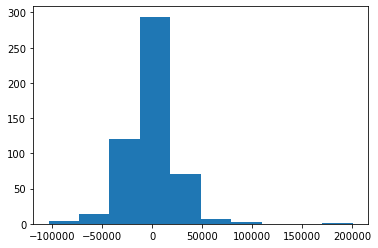

In [49]:
plt.hist(resids, bins=10)

In [ ]:
# ### Old inefficient use one below
# features_7 = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd', 'since_remod/add',
#        '1st_flr_sf', 'garage_area', 'kitchen_qual_order', 'garage_cars', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1',]]

# # features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [103]:
features_7 = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
                 'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'fireplaces']]

# features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [92]:
# features_7 = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
#                  'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'neighborhood']]

# features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [93]:
# features_7 = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
#                  'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'bsmtfin_sf_1', 'neighborhood' ]]

# features_7 = pd.get_dummies(features_7, columns=['neighborhood'], drop_first=True);

In [104]:
X = features_7
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [105]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8006073629477961, 0.8515072672162076)

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# pipe lines
pipe_lr = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('lr', LinearRegression())
])

pipe_lcv = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('lcv', LassoCV())
])

pipe_lr.fit(X_train, y_train)

params = {
    'lr__penalty': ['l1', 'l2']
}

pipe_lr.score(X_train, y_train), pipe_lr.score(X_test, y_test)

(0.9102930786561497, 0.9077780609332623)

In [107]:
X = features_7
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)
pd.DataFrame(X_test_pf, columns=pf.get_feature_names(X.columns))

,gr_liv_area,age,overall_qual,gr_liv_area/totrms_abvgrd,since_remod/add,garage_area,kitchen_qual_order,total_bsmt_sf,before_1940,over_10,...,before_1940^2,before_1940 over_10,before_1940 bsmtfin_sf_1,before_1940 fireplaces,over_10^2,over_10 bsmtfin_sf_1,over_10 fireplaces,bsmtfin_sf_1^2,bsmtfin_sf_1 fireplaces,fireplaces^2
0,1077.0,71.0,5.0,215.400000,60.0,205.0,2.0,991.0,1.0,1.0,...,1.0,1.0,851.0,2.0,1.0,851.0,2.0,724201.0,1702.0,4.0
1,1824.0,39.0,7.0,364.800000,8.0,739.0,3.0,1643.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1219.0,2.0,1485961.0,2438.0,4.0
2,987.0,38.0,6.0,197.400000,38.0,288.0,2.0,483.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,110.0,0.0,12100.0,0.0,0.0
3,1798.0,110.0,4.0,256.857143,60.0,342.0,2.0,1075.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1750.0,70.0,6.0,250.000000,25.0,423.0,2.0,983.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,660.0,0.0,435600.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1025.0,48.0,5.0,170.833333,48.0,0.0,2.0,1025.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,953.0,0.0,908209.0,0.0,0.0
509,1646.0,6.0,7.0,329.200000,5.0,482.0,4.0,1594.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2172676.0,1474.0,1.0
510,1652.0,95.0,5.0,236.000000,60.0,416.0,2.0,686.0,1.0,1.0,...,1.0,1.0,686.0,0.0,1.0,686.0,0.0,470596.0,0.0,0.0
511,1920.0,52.0,5.0,240.000000,52.0,451.0,3.0,1052.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,1.0,3249.0,57.0,1.0


In [108]:
ss = StandardScaler()                  
ss.fit(X_train_pf)
Z_train = ss.transform(X_train_pf)
Z_test = ss.transform(X_test_pf)

In [109]:
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train), lr.score(Z_test, y_test)

(0.9102930786561497, 0.9077780609332623)

In [110]:
# incorporated here in order to reintroduce 'saleprice' to get corr
features_7 = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
                 'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'fireplaces','saleprice']]

In [111]:
pd.DataFrame(features_7.corr()['saleprice'].sort_values(ascending=False))

,saleprice
saleprice,1.000000
overall_qual,0.800028
gr_liv_area,0.697032
kitchen_qual_order,0.692481
garage_area,0.650097
total_bsmt_sf,0.628894
gr_liv_area/totrms_abvgrd,0.546745
fireplaces,0.470740
bsmtfin_sf_1,0.423583
before_1940,-0.291918


In [112]:
 coef_df = pd.DataFrame({
     'coef': pf.get_feature_names(X.columns),
     'lr coefs': lr.coef_,
})

coef_df.sort_values(by= 'lr coefs', ascending= False).head(15)

,coef,lr coefs
59,since_remod/add over_10,87462.029877
14,gr_liv_area overall_qual,45919.525831
40,overall_qual total_bsmt_sf,39091.189454
45,gr_liv_area/totrms_abvgrd^2,24652.577024
18,gr_liv_area kitchen_qual_order,24274.756863
0,gr_liv_area,23614.825330
52,gr_liv_area/totrms_abvgrd bsmtfin_sf_1,21951.837933
63,garage_area kitchen_qual_order,19764.546306
70,kitchen_qual_order total_bsmt_sf,15883.078734
20,gr_liv_area before_1940,14066.279213


In [113]:
features_7.corr()

,gr_liv_area,age,overall_qual,gr_liv_area/totrms_abvgrd,since_remod/add,garage_area,kitchen_qual_order,total_bsmt_sf,before_1940,over_10,bsmtfin_sf_1,fireplaces,saleprice
gr_liv_area,1.000000,-0.259183,0.566727,0.644838,-0.321619,0.490692,0.443938,0.453846,-0.067819,-0.253665,0.215247,0.458856,0.697032
age,-0.259183,1.000000,-0.602635,-0.291089,0.629989,-0.486986,-0.538064,-0.410185,0.747533,0.672034,-0.275800,-0.167941,-0.571726
overall_qual,0.566727,-0.602635,1.000000,0.502222,-0.584594,0.563578,0.691017,0.548681,-0.250484,-0.584754,0.278875,0.388326,0.800028
gr_liv_area/totrms_abvgrd,0.644838,-0.291089,0.502222,1.000000,-0.312751,0.393584,0.401929,0.379951,-0.116981,-0.229039,0.267342,0.377145,0.546745
since_remod/add,-0.321619,0.629989,-0.584594,-0.312751,1.000000,-0.398623,-0.617431,-0.308749,0.278631,0.610380,-0.166624,-0.138606,-0.550142
garage_area,0.490692,-0.486986,0.563578,0.393584,-0.398623,1.000000,0.485867,0.488805,-0.292447,-0.394969,0.331611,0.291368,0.650097
kitchen_qual_order,0.443938,-0.538064,0.691017,0.401929,-0.617431,0.485867,1.000000,0.438450,-0.231343,-0.593766,0.253942,0.259590,0.692481
total_bsmt_sf,0.453846,-0.410185,0.548681,0.379951,-0.308749,0.488805,0.438450,1.000000,-0.263279,-0.348805,0.539081,0.332986,0.628894
before_1940,-0.067819,0.747533,-0.250484,-0.116981,0.278631,-0.292447,-0.231343,-0.263279,1.000000,0.268386,-0.270722,-0.116783,-0.291918
over_10,-0.253665,0.672034,-0.584754,-0.229039,0.610380,-0.394969,-0.593766,-0.348805,0.268386,1.000000,-0.091428,-0.084942,-0.521499


In [114]:
y_preds = pipe_lr.predict(X_test)
resids = y_test-y_preds
resids.mean()

-1327.669992164651

In [115]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lr, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 17072.120261429816
RMSE = 24218.36558144886
CVS = 0.8758059705210639


Text(0.5, 0, 'Predicted housing price in dollars($)')

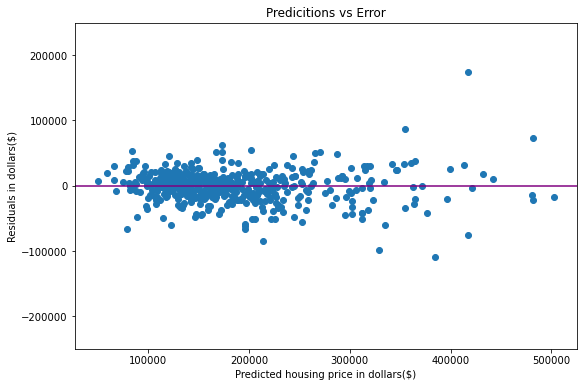

In [116]:
plt.figure(figsize=(9,6))
plt.scatter(y_preds, resids)
plt.axhline(0, color='purple')
plt.ylim(-250000, 250000)
plt.title("Predicitions vs Error")
plt.ylabel('Residuals in dollars($)')
plt.xlabel('Predicted housing price in dollars($)')

Text(0.5, 0, 'Predicted pricing in dollars($)')

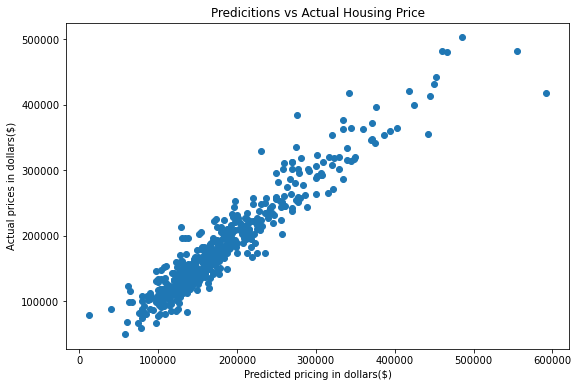

In [117]:
plt.figure(figsize=(9,6))
plt.scatter(y_test, y_preds)
plt.title("Predicitions vs Actual Housing Price")
plt.ylabel('Actual prices in dollars($)')
plt.xlabel('Predicted pricing in dollars($)')

In [119]:
coefficients_lr_model.rename(columns={0: 'coefficient', 1: 'feature'}, inplace=True)

coefficients_lr_model['coefficients'] = [abs(n) for n in coefficients_lr_model['coefficients']]
coefficients_lr_model.sort_values(by='coefficients', ascending=False)

KeyError: 'coefficients'

In [462]:
coefficients_lr_model.sort_values(by='coefficients', ascending=False).head(6)

,coefficients,feature
1,290705.767514,age
2,194009.993981,age*overall_qual
3,55197.869144,overall_qual
5,53865.109632,since_remod/add
7,24838.040579,kitchen_qual_order
4,22142.163292,gr_liv_area/totrms_abvgrd


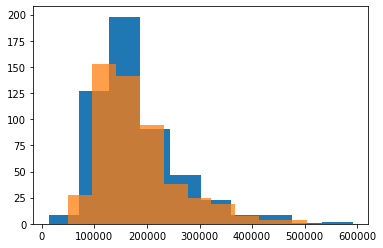

In [446]:
plt.hist(y_test)
plt.hist(y_preds, alpha=.75);

In [395]:
pipe_lcv.fit(X_train, y_train);

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885768184.7346191, tolerance: 787358189.9797889
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810184439.9365234, tolerance: 776863606.6445853
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878691524.2617188, tolerance: 776863606.6445853
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

In [396]:
pipe_lcv.score(X_train, y_train) , pipe_lcv.score(X_test, y_test)

(0.9081088183294221, 0.911231719440444)

In [36]:
y_preds = pipe_lcv.predict(X_test)
resids = y_test-y_preds        

In [37]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lcv, X_train, y_train, cv=5)
print(f'CVS = {cvs}')

MAE = 16020.614922399329
RMSE = 22703.169003555427


C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 668617084.3460693, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798029558.730957, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825094644.2859497, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

CVS = [0.90773189 0.88926324 0.89295319 0.8971247  0.87311983]


---

### Final Model

In [293]:
features_8 = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
                 'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'neighborhood', 'fireplaces']]
features_8 = pd.get_dummies(features_8, columns=['neighborhood'], drop_first=True);

In [267]:
X = features_8
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Linear Regression

In [268]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8371976739005416, 0.8676609106458459)

In [297]:
# pipe lines
pipe_lr = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('lr', LinearRegression())
])

pipe_lcv = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('lcv', LassoCV())
])

In [298]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('lr', LinearRegression())])

In [299]:
params = {
    'lr__penalty': ['l1', 'l2']
}

In [300]:
pipe_lr.score(X_train, y_train), pipe_lr.score(X_test, y_test)

(0.95043372898242, -7.457838611693778e+19)

In [301]:
y_preds = pipe_lr.predict(X_test)
resids = y_test-y_preds        

In [302]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lr, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 32969942732400.152
RMSE = 688706523056020.9
CVS = -2.3870648474263787e+22


In [303]:
pipe_lcv.fit(X_train, y_train);

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1756150539.3270264, tolerance: 960340167.395799
  model = cd_fast.enet_coordinate_descent(


In [304]:
pipe_lcv.score(X_train, y_train) , pipe_lcv.score(X_test, y_test)

(0.9323153184789453, 0.9252768903053927)

In [305]:
y_preds = pipe_lcv.predict(X_test)
resids = y_test-y_preds        

In [306]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lcv, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 15433.07206341566
RMSE = 21799.933789874132


C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657900454.567627, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797145814.812439, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866980790.9504395, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

CVS = 0.8998104664289606


In [285]:
from sklearn.linear_model import RidgeCV

In [286]:
pipe_rcv = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('rcv', RidgeCV())
])

In [287]:
pipe_rcv.fit(X_train, y_train)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('rcv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [288]:
pipe_rcv.score(X_train, y_train), pipe_rcv.score(X_test, y_test)

(0.9448795677430742, 0.9217632235520721)

In [290]:
y_preds = pipe_rcv.predict(X_test)
resids = y_test-y_preds        

In [291]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lcv, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 16000.636997752577
RMSE = 22306.589746632882


C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657900454.567627, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797145814.812439, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866980790.9504395, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

CVS = 0.8998104664289606
